In [ ]:
#Title:     Heart Disease Prediction
#Group No.: 30
#Names/Registration No.:  Samasundara S.M.R.D.S - EG/2020/4184
#                         Samoda S.M.S.T        - EG/2020/4185

**Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

**Data Collection and Processing**

In [82]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
#heart_data=pd.read_csv('/content/drive/My Drive/ml_project/data.csv')
heart_data = pd.read_csv('data.csv')

**Getting Some Information About the Data**

In [ ]:
heart_data.head() #Print first five rows

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
heart_data.shape  #Number of rows and columns

(4238, 16)

In [ ]:
heart_data.info() #Checking the information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
heart_data['TenYearCHD'].value_counts() #Check about output distribution

0    3594
1     644
Name: TenYearCHD, dtype: int64

**Handling Null Values**

In [ ]:
heart_data.isnull().sum()   #Check the number of null values for each feature

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
#Stastical values of null features
null_values=['education','cigsPerDay','BPMeds','totChol','BMI','glucose','heartRate']
heart_data[null_values].describe().T

,count,mean,std,min,25%,50%,75%,max
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.00,4.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.00,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.00,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.00,696.0
BMI,4219.0,25.802008,4.080111,15.54,23.07,25.4,28.04,56.8
glucose,3850.0,81.966753,23.959998,40.00,71.00,78.0,87.00,394.0
heartRate,4237.0,75.878924,12.026596,44.00,68.00,75.0,83.00,143.0


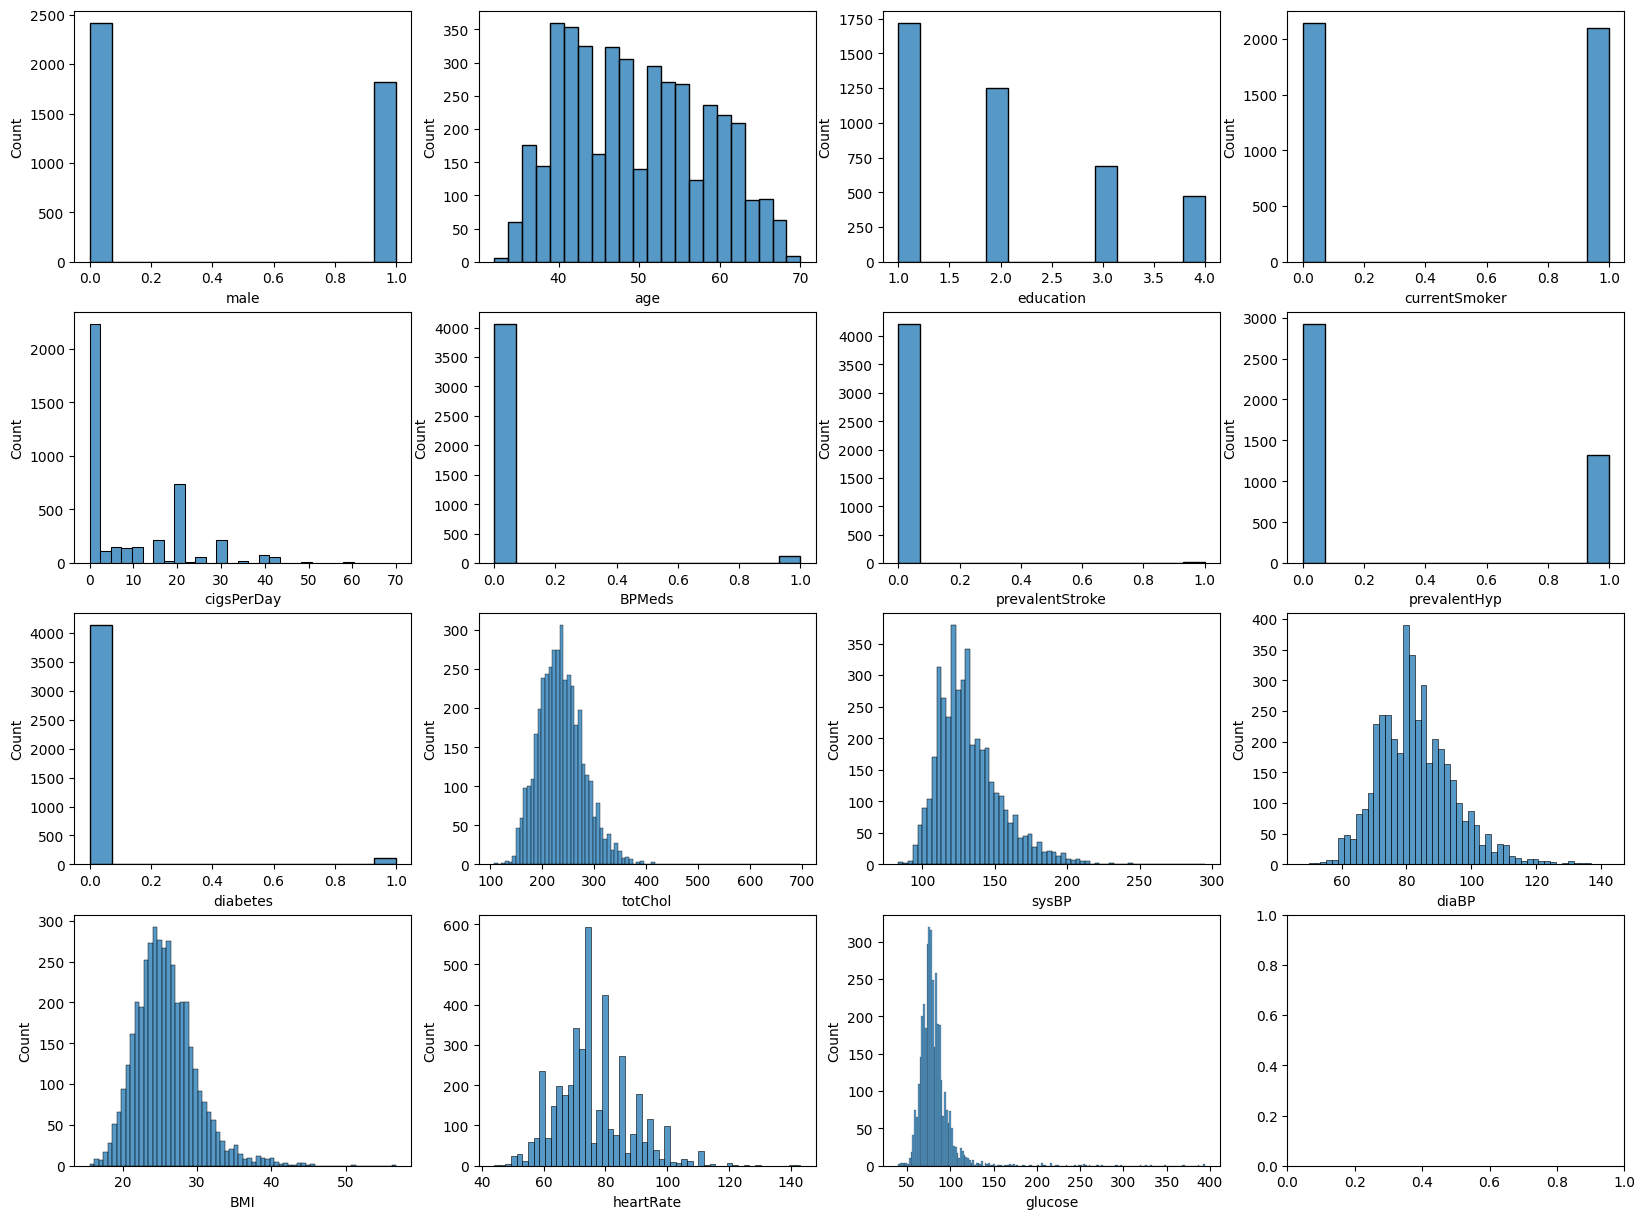

In [ ]:
#Plot the distribution of the all the features
fig, ax = plt.subplots(4, 4, figsize=(20,15))
for i in range(15):
  sns.histplot(data=heart_data, x=heart_data.get(heart_data.columns[i]), ax=ax[i // 4, i % 4])
plt.show()


In [ ]:
#Replacing the null values with the median of the relevent feature
null_values=['education','cigsPerDay','BPMeds','totChol','BMI','glucose','heartRate']
for i in null_values :
    x= heart_data[i].median()
    heart_data[i].fillna(x, inplace = True)

In [ ]:
#Check the null values after the median replacing
heart_data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**Feature Selection**

In [ ]:
#Split data as X and Y
x = heart_data.drop('TenYearCHD',axis=1)
y = heart_data['TenYearCHD']

In [ ]:
#Number of features after the feature selection
num_features = 10

In [ ]:
#Calculates the mutual information between x and y
mutual_info = mutual_info_classif(x, y)

In [ ]:
selector = SelectKBest(mutual_info_classif, k=num_features)
selector.fit(x, y)

SelectKBest(score_func=<function mutual_info_classif at 0x79989636a710>)

<Axes: >

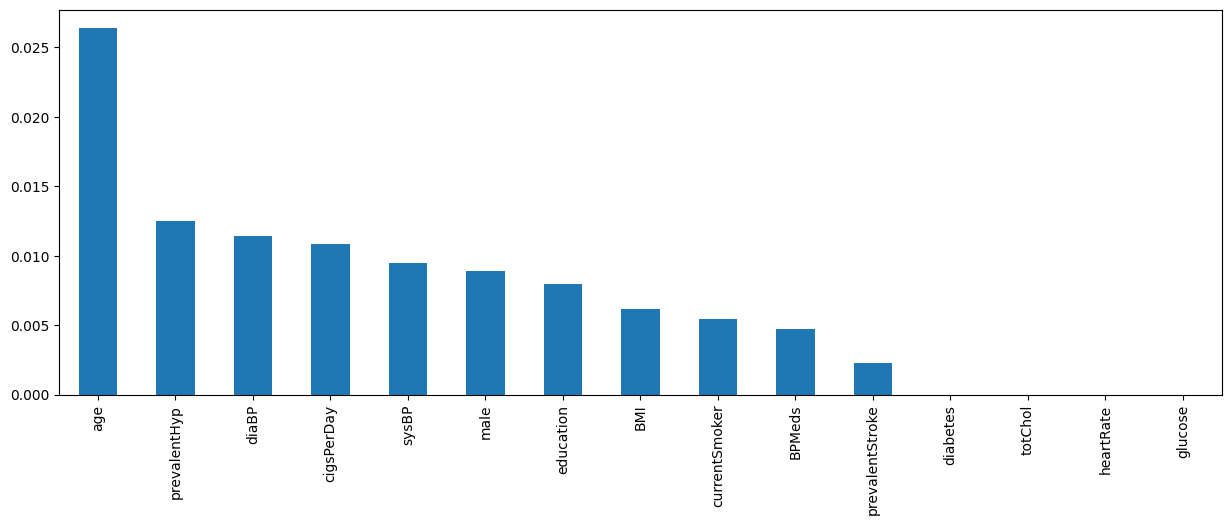

In [ ]:
#Visualizing the mutual information scores calculated
mi_score = pd.Series(selector.scores_,index = x.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
#Taking the top realted features indexes
top_feature_indices = selector.get_support(indices=True)

In [ ]:
#Selecting the top features
top_features = x.columns[top_feature_indices]

In [ ]:
#Create a data frame using top features
top_features_df = x[top_features]

In [ ]:
#Print the first five rows of the top features
print(top_features_df.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentHyp  \
0     1   39        4.0              0         0.0     0.0             0   
1     0   46        2.0              0         0.0     0.0             0   
2     1   48        1.0              1        20.0     0.0             0   
3     0   61        3.0              1        30.0     0.0             1   
4     0   46        3.0              1        23.0     0.0             0   

   sysBP  diaBP    BMI  
0  106.0   70.0  26.97  
1  121.0   81.0  28.73  
2  127.5   80.0  25.34  
3  150.0   95.0  28.58  
4  130.0   84.0  23.10  


**Handle Imbalanced Data**

In [ ]:
#Check the number of chategories in the result column
heart_data['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

Text(0.5, 1.0, 'Count of TenYearCHD')

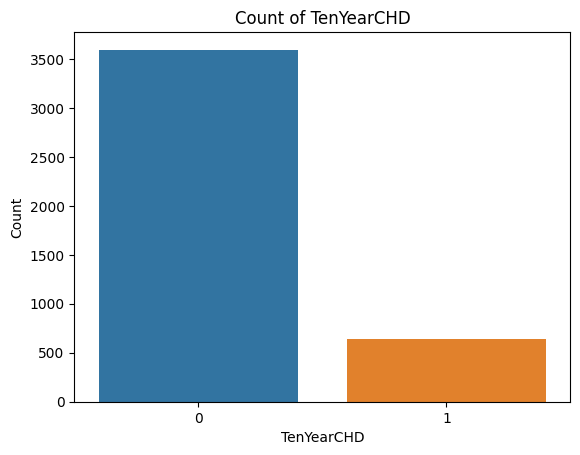

In [ ]:
#Plot the result column values with counts
sns.countplot(x='TenYearCHD', data=heart_data)
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.title('Count of TenYearCHD')

***SMOTE***

In [ ]:
smote = SMOTE()

In [ ]:
#Using oversampling technique SMOTE, oversample the total dataset
x_smote,y_smote = smote.fit_resample(top_features_df,y)

In [ ]:
#Check the number of values again in the result feature
y_smote.value_counts()

0    3594
1    3594
Name: TenYearCHD, dtype: int64

In [ ]:
#Add two dataframes and create one dataframe and print the tail 5 values
heart_data = pd.concat([x_smote,y_smote], axis=1)
heart_data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,sysBP,diaBP,BMI,TenYearCHD
7183,0,57,2.000000,0,1.757663,0.000000,0,132.175766,92.945402,24.574991,1
7184,0,66,1.000000,0,0.000000,0.968487,1,201.126051,92.684872,29.984222,1
7185,0,44,2.890448,0,0.000000,0.000000,0,119.945224,79.753508,21.857334,1
7186,0,44,1.728261,1,20.000000,0.000000,0,111.456522,78.543478,23.143587,1
7187,0,51,1.000000,0,0.000000,0.000000,1,150.433045,92.195869,25.296569,1


**Feature Scaling**

In [ ]:
#Print the columns of the dataset
print(heart_data.columns)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentHyp', 'sysBP', 'diaBP', 'BMI', 'TenYearCHD'],
      dtype='object')


In [ ]:
#Standerdize the features
st = StandardScaler()
heart_data_scaled = st.fit_transform(heart_data)
heart_data = pd.DataFrame(heart_data_scaled, columns=heart_data.columns)

In [ ]:
#Print the first five rows of the dataset
heart_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,sysBP,diaBP,BMI,TenYearCHD
0,1.247837,-1.462753,2.203209,-0.962849,-0.786174,-0.219747,-0.725338,-1.272236,-1.147677,0.234664,-1.0
1,-0.801387,-0.630109,0.082380,-0.962849,-0.786174,-0.219747,-0.725338,-0.655250,-0.282662,0.678318,-1.0
2,1.247837,-0.392211,-0.978034,1.038585,0.849103,-0.219747,-0.725338,-0.387889,-0.361300,-0.176220,-1.0
3,-0.801387,1.154127,1.142794,1.038585,1.666741,-0.219747,1.378668,0.537590,0.818265,0.640506,1.0
4,-0.801387,-0.630109,1.142794,1.038585,1.094394,-0.219747,-0.725338,-0.285058,-0.046749,-0.740870,-1.0


**Split Dataset into Training and Testing Data**

In [ ]:
#Divide dataset into two categories
x = heart_data.drop('TenYearCHD',axis=1)
y = heart_data['TenYearCHD']

In [ ]:
#Split the dataset as train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
#print the train data set x variables values
x_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,sysBP,diaBP,BMI
3169,-0.801387,-1.343804,1.142794,1.038585,-0.050299,-0.219747,-0.725338,-0.902044,-0.282662,-0.834138
2004,-0.801387,-0.868007,-0.978034,-0.962849,-0.786174,-0.219747,-0.725338,-1.025441,-1.776778,1.116930
1194,-0.801387,1.273077,-0.978034,-0.962849,-0.786174,-0.219747,1.378668,1.936091,0.425077,-0.002287
4013,1.247837,-1.462753,2.203209,1.038585,-0.050299,-0.219747,-0.725338,-0.778647,-0.833126,-0.851783
1756,-0.801387,-0.868007,-0.978034,-0.962849,-0.786174,-0.219747,-0.725338,-0.202793,-0.204024,0.675797
...,...,...,...,...,...,...,...,...,...,...
3772,1.247837,-1.462753,0.082380,1.038585,0.031464,-0.219747,-0.725338,-1.436765,-1.580184,-0.387964
5191,-0.801387,0.321484,-0.978034,-0.962849,-0.731297,-0.219747,-0.725338,-0.728312,-0.300255,0.991123
5226,-0.801387,1.392026,-0.978034,-0.962849,-0.786174,-0.219747,1.378668,1.224941,1.226621,0.467683
5390,-0.801387,0.559382,1.389798,-0.962849,-0.786174,-0.219747,1.378668,1.875797,2.043624,0.196822


**SVM**

In [ ]:
#Support Vector machine model train
from sklearn.svm import SVC
svm = SVC(C=100, kernel='rbf')
svm.fit(x_train,y_train)

SVC(C=100)

In [ ]:
#predict the result using model using test dataset
y_pred1 = svm.predict(x_test)

In [ ]:
#Check the accuracy for the SVM Model
accuracy_score(y_test,y_pred1)

0.7524339360222532

In [ ]:
 #Create the confusion matrix for the SVM model
 from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
 conf_matrix = confusion_matrix(y_test,y_pred1)

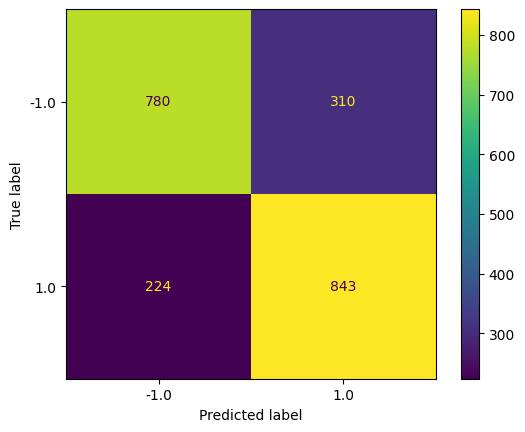

In [ ]:
#Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=svm.classes_)
disp.plot()
plt.show()

In [ ]:
#Create the classification report
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_test,y_pred1,output_dict=True))
report

,-1.0,1.0,accuracy,macro avg,weighted avg
precision,0.776892,0.731136,0.752434,0.754014,0.754258
recall,0.715596,0.790066,0.752434,0.752831,0.752434
f1-score,0.744986,0.759459,0.752434,0.752223,0.752145
support,1090.000000,1067.000000,0.752434,2157.000000,2157.000000


**Hyperparameter optimization**

In [ ]:
#Import library and parameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100],'kernel':['rbf','linear','poly','sigmoid']}

In [ ]:
#Create grid search
grid_search = GridSearchCV(estimator=svm,param_grid=param_grid)

In [ ]:
#Train the model for grid
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(C=10),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [ ]:
#Find the best combination of hyperparameter
grid_search.best_params_

{'C': 100, 'kernel': 'rbf'}

In [ ]:
grid_search.score(x_test,y_test)

0.7524339360222532

**Random Forest**

In [ ]:
#Import Libraries
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Import the data again
#heart_data_rf = pd.read_csv('/content/drive/My Drive/ml_project/data.csv')
heart_data_rf = pd.read_csv('data.csv')

In [ ]:
#Checking for nul values
heart_data_rf.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
#Filling Null values with median
null_values=['education','cigsPerDay','BPMeds','totChol','BMI','glucose','heartRate']
for i in null_values :
    x= heart_data_rf[i].median()
    heart_data_rf[i].fillna(x, inplace = True)

In [ ]:
#Split features
x = heart_data_rf.drop('TenYearCHD',axis=1)
y = heart_data_rf['TenYearCHD']

Text(0.5, 1.0, 'Count of TenYearCHD')

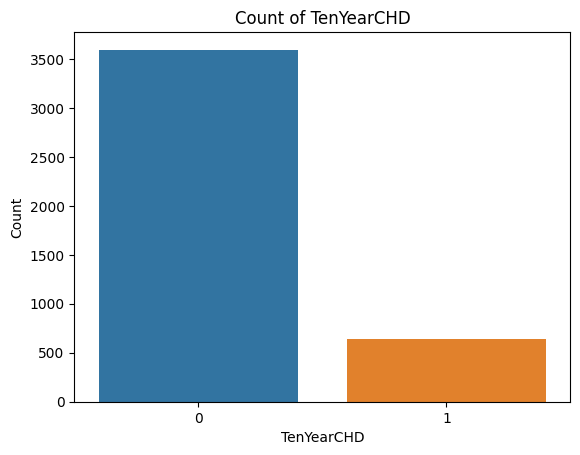

In [ ]:
#Visualizing data imbalnce
sns.countplot(x='TenYearCHD', data=heart_data_rf)
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.title('Count of TenYearCHD')

In [ ]:
#Oversampling the data
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)
y_smote.value_counts()

0    3594
1    3594
Name: TenYearCHD, dtype: int64

In [ ]:
#Split the data into train test splits and train the model
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)
rf = RandomForestClassifier(criterion='log_loss', n_estimators=1000)

In [ ]:
#Train the model and predict the value
rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test)

In [ ]:
#Accuracy
accuracy_score(y_test,y_pred2)

0.911682892906815

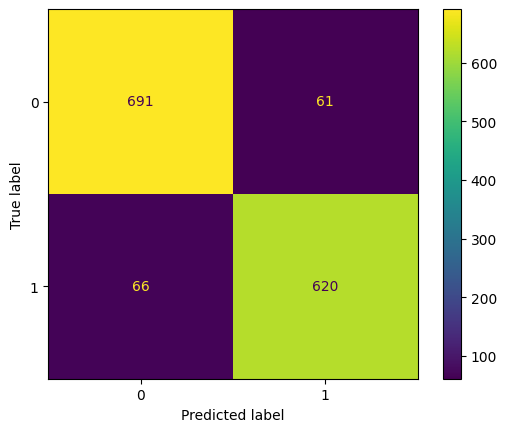

In [ ]:
#Display the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=rf.classes_)
disp.plot()
plt.show()

In [ ]:
#Create the classification report
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_test,y_pred2,output_dict=True))
report

,0,1,accuracy,macro avg,weighted avg
precision,0.912814,0.910426,0.911683,0.911620,0.911675
recall,0.918883,0.903790,0.911683,0.911337,0.911683
f1-score,0.915838,0.907096,0.911683,0.911467,0.911668
support,752.000000,686.000000,0.911683,1438.000000,1438.000000


In [ ]:
#Hyperparameter Optimization using grid search CV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[10,100,1000],'criterion':['entropy','gini','log_loss']}

In [ ]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(criterion='log_loss',
                                              n_estimators=1000),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'n_estimators': [10, 100, 1000]})

In [ ]:
grid_search.best_params_

{'criterion': 'entropy', 'n_estimators': 1000}

In [ ]:
grid_search.score(x_test,y_test)

0.9123783031988874